# Data Loading & Setup

In [ ]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import ks_2samp

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)


In [ ]:
#Load Data
df = pd.read_csv("data.csv")

In [ ]:
#Drop irrelevant columns
drop_cols = [
    "Over18",
    "EmployeeCount",
    "StandardHours",
    "EmployeeNumber",
    "JobRole",
    "EducationField"
]
df = df.drop(columns=drop_cols, errors="ignore")

In [ ]:
print("Shape:", df.shape)
print("Duplicates:", df.duplicated().sum())

Shape: (1470, 29)
Duplicates: 0


In [ ]:
#Identify initial column types
categorical_cols_all = df.select_dtypes(include="object").columns
numeric_cols_all = df.select_dtypes(exclude="object").columns

display(df[numeric_cols_all].describe().T)

print("\nValue Counts for Categorical Columns:")
for col in categorical_cols_all:

    display(df[col].value_counts())

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0



Value Counts for Categorical Columns:


,count
Attrition,
No,1233
Yes,237


,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


,count
Department,
Research & Development,961
Sales,446
Human Resources,63


,count
Gender,
Male,882
Female,588


,count
MaritalStatus,
Married,673
Single,470
Divorced,327


,count
OverTime,
No,1054
Yes,416


# Missing Data Simulation

In [ ]:
df_before_missing = df.copy()



Missing counts (after injection if applied):


,0
DistanceFromHome,102
JobSatisfaction,102
MonthlyIncome,102
TotalWorkingYears,102
YearsAtCompany,102


<Figure size 1000x600 with 0 Axes>

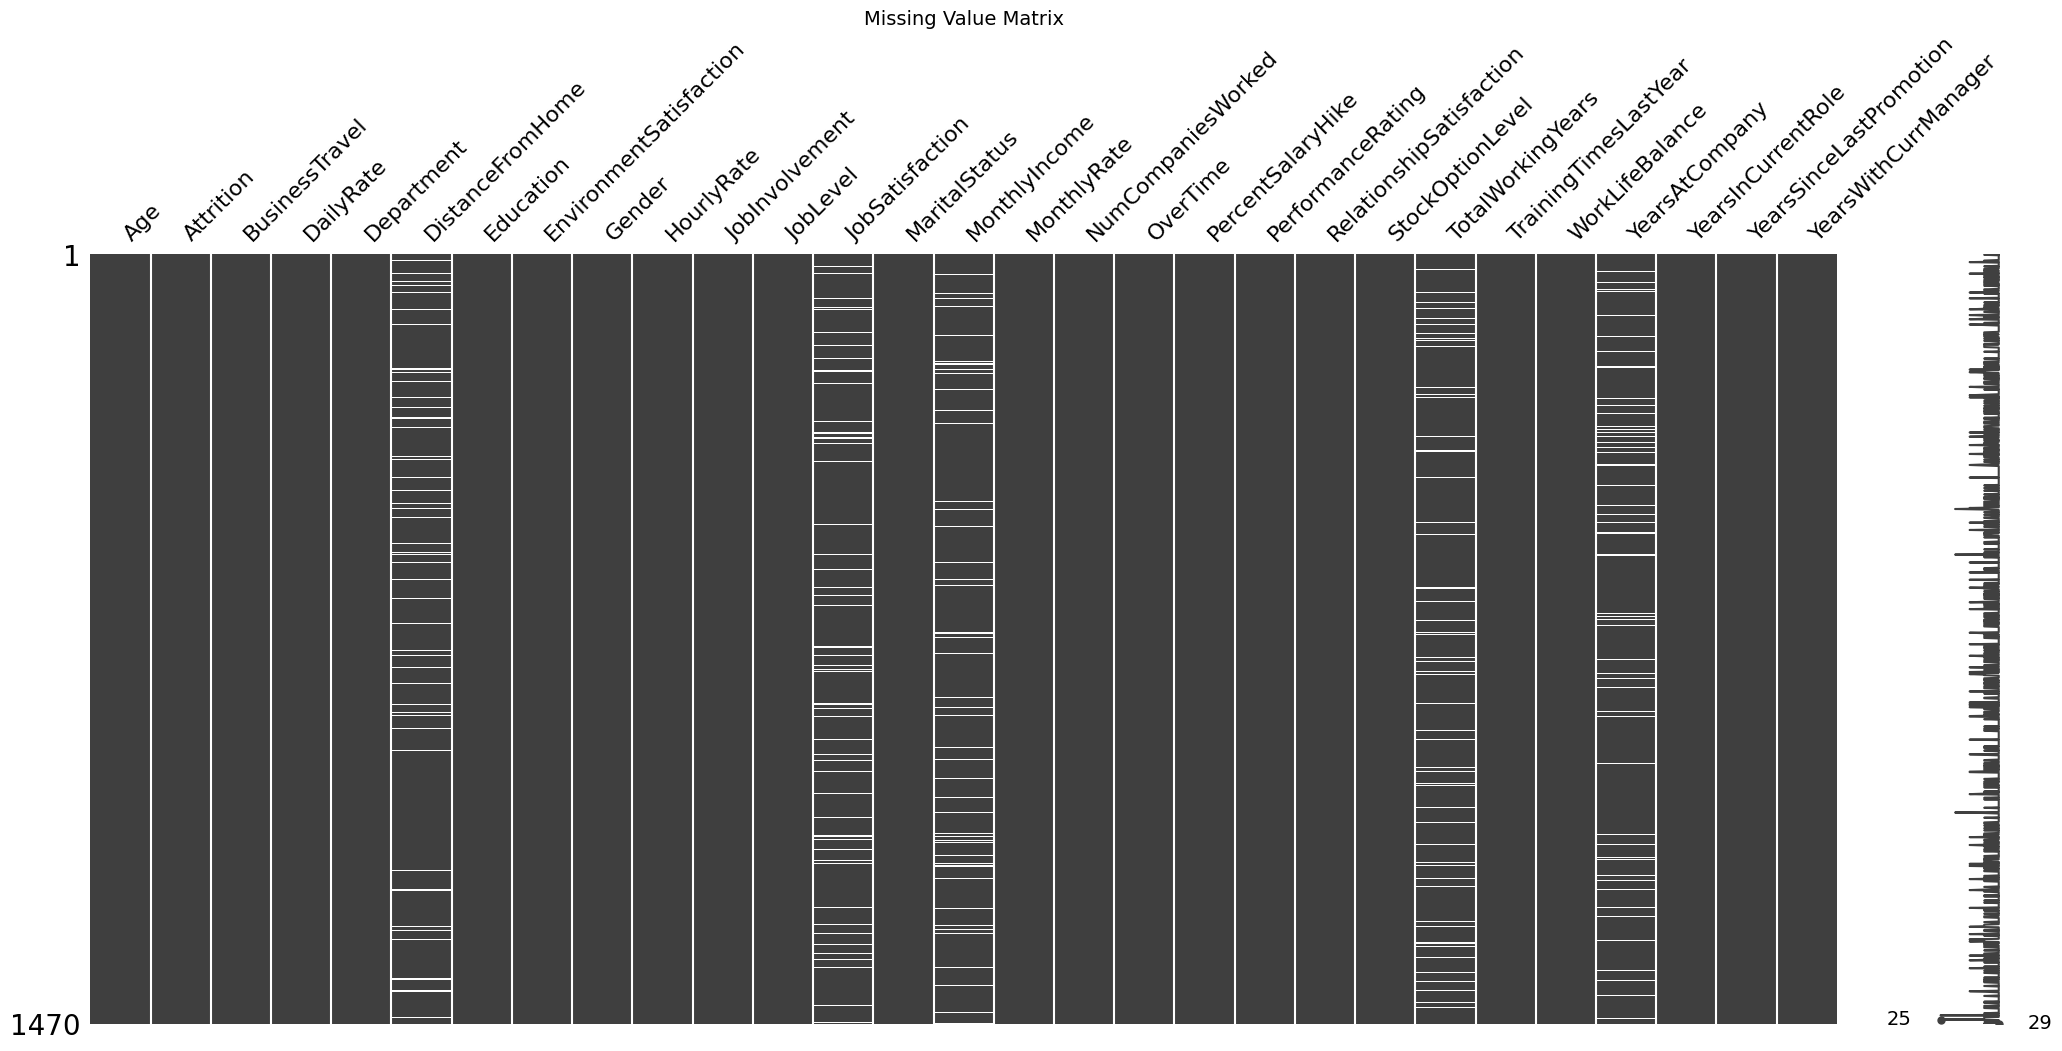

In [ ]:
#Inject missingness if dataset has no missing values
np.random.seed(411)

missing_cols = [
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "DistanceFromHome",
    "JobSatisfaction"
]
missing_rate = 0.07

if df.isnull().sum().sum() == 0:
    for col in missing_cols:
        if col in df.columns:
            n_missing = int(missing_rate * len(df))
            missing_idx = np.random.choice(df.index, n_missing, replace=False)
            df.loc[missing_idx, col] = np.nan

print("\nMissing counts (after injection if applied):")
display(df.isnull().sum()[df.isnull().sum() > 0])

plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.title("Missing Value Matrix", fontsize=14)
plt.show()

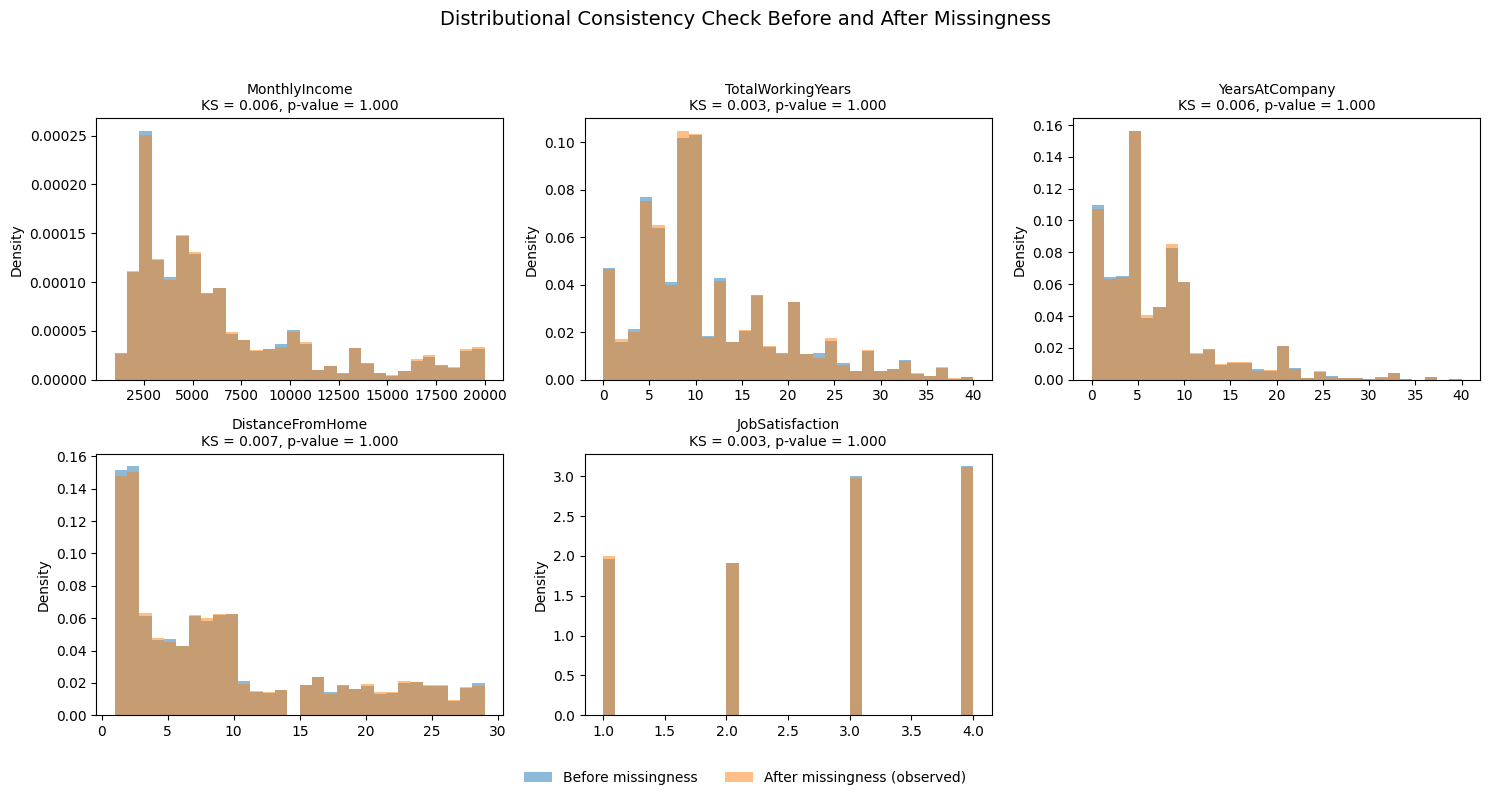

,Variable,KS_statistic,p_value
0,MonthlyIncome,0.006254,1.0
1,TotalWorkingYears,0.002978,1.0
2,YearsAtCompany,0.006131,1.0
3,DistanceFromHome,0.006525,1.0
4,JobSatisfaction,0.003276,1.0


In [ ]:
check_cols = [
    "MonthlyIncome",
    "TotalWorkingYears",
    "YearsAtCompany",
    "DistanceFromHome",
    "JobSatisfaction"
]

ks_results = []

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(check_cols):
    if col not in df.columns:
        continue

    ax = axes[i]

    x_before = df_before_missing[col].dropna()
    x_after_obs = df[col].dropna()

    ax.hist(x_before, bins=30, density=True, alpha=0.5, label="Before missingness")
    ax.hist(x_after_obs, bins=30, density=True, alpha=0.5, label="After missingness (observed)")


    ks_stat, p_value = ks_2samp(x_before, x_after_obs)


    ks_results.append({
        "Variable": col,
        "KS_statistic": ks_stat,
        "p_value": p_value
    })

    ax.set_title(
        f"{col}\nKS = {ks_stat:.3f}, p-value = {p_value:.3f}",
        fontsize=10
    )
    ax.set_ylabel("Density")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="lower center",
    ncol=2,
    frameon=False
)

fig.suptitle(
    "Distributional Consistency Check Before and After Missingness",
    fontsize=14
)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

# KS test result table
ks_df = pd.DataFrame(ks_results)

ks_df


# Train/Test Split BEFORE Imputation

In [ ]:
#Train/Test Split BEFORE Imputation (avoid leakage)

target = "Attrition"

if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found. Please set `target` correctly.")

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=411,
    stratify=y
)

print("\nTrain/Test Shapes:", X_train.shape, X_test.shape)


Train/Test Shapes: (1176, 28) (294, 28)


In [ ]:
#Re-identify column types on X only (target excluded)
numeric_cols = X_train.select_dtypes(exclude="object").columns
categorical_cols = X_train.select_dtypes(include="object").columns

In [ ]:
#Keep only missing_cols that exist in X
missing_cols = [c for c in missing_cols if c in X_train.columns]


#Mean Median KNN Imputation

In [ ]:
#Imputation
#Mean
X_train_mean = X_train.copy()
X_test_mean  = X_test.copy()

for col in missing_cols:
    mean_val = X_train_mean[col].mean()
    X_train_mean[col] = X_train_mean[col].fillna(mean_val)
    X_test_mean[col]  = X_test_mean[col].fillna(mean_val)

In [ ]:
#Median
X_train_median = X_train.copy()
X_test_median  = X_test.copy()

for col in missing_cols:
    med_val = X_train_median[col].median()
    X_train_median[col] = X_train_median[col].fillna(med_val)
    X_test_median[col]  = X_test_median[col].fillna(med_val)

In [ ]:
#kNN + scaling
X_train_knn = X_train.copy()
X_test_knn  = X_test.copy()

scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

X_train_num_scaled = scaler.fit_transform(X_train_knn[numeric_cols])
X_test_num_scaled  = scaler.transform(X_test_knn[numeric_cols])

X_train_num_imp = imputer.fit_transform(X_train_num_scaled)
X_test_num_imp  = imputer.transform(X_test_num_scaled)

X_train_num_final = scaler.inverse_transform(X_train_num_imp)
X_test_num_final  = scaler.inverse_transform(X_test_num_imp)

X_train_knn.loc[:, numeric_cols] = X_train_num_final
X_test_knn.loc[:, numeric_cols]  = X_test_num_final

In [ ]:
print("\nRemaining missing (train):",
      "Mean:", X_train_mean.isnull().sum().sum(),
      "| Median:", X_train_median.isnull().sum().sum(),
      "| kNN:", X_train_knn.isnull().sum().sum())

print("Remaining missing (test):",
      "Mean:", X_test_mean.isnull().sum().sum(),
      "| Median:", X_test_median.isnull().sum().sum(),
      "| kNN:", X_test_knn.isnull().sum().sum())

if "MonthlyIncome" in X_train.columns:
    variance_comparison = {
        "Mean":   X_train_mean["MonthlyIncome"].var(),
        "Median": X_train_median["MonthlyIncome"].var(),
        "kNN":    X_train_knn["MonthlyIncome"].var()
    }
    display(pd.DataFrame.from_dict(
        variance_comparison,
        orient="index",
        columns=["MonthlyIncome Variance (Train)"]
    ))


Remaining missing (train): Mean: 0 | Median: 0 | kNN: 0
Remaining missing (test): Mean: 0 | Median: 0 | kNN: 0


,MonthlyIncome Variance (Train)
Mean,2.096175e+07
Median,2.112888e+07
kNN,2.164006e+07


In [ ]:
#Final dataset choice
X_train_final, X_test_final = X_train_knn.copy(), X_test_knn.copy()
y_train_final, y_test_final = y_train.copy(), y_test.copy()

print("\nFinal Shapes:", X_train_final.shape, X_test_final.shape)


Final Shapes: (1176, 28) (294, 28)


# EDA

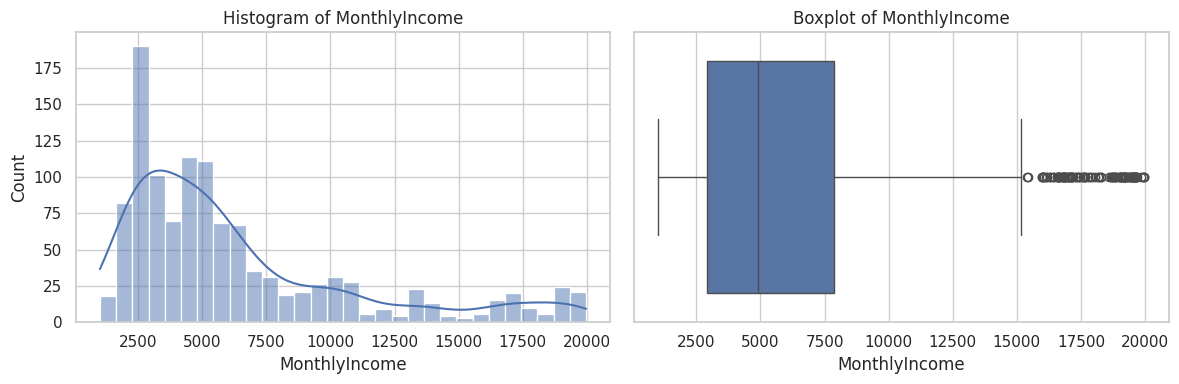

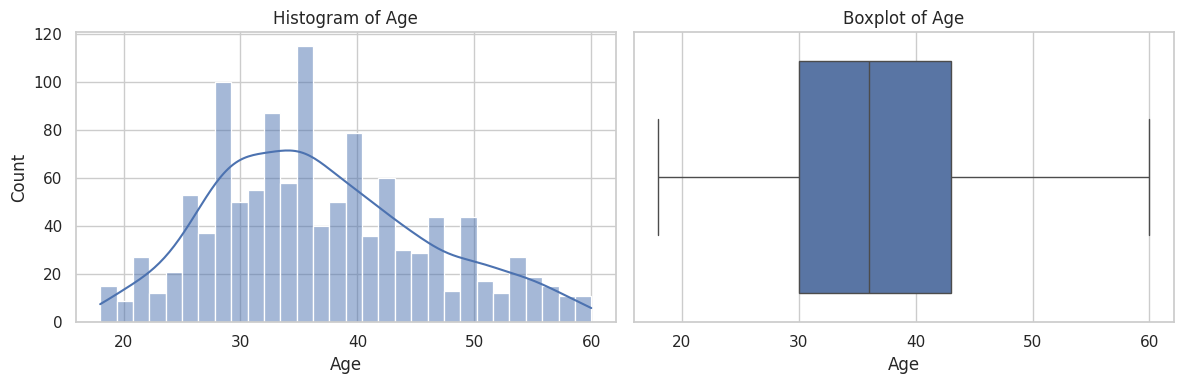

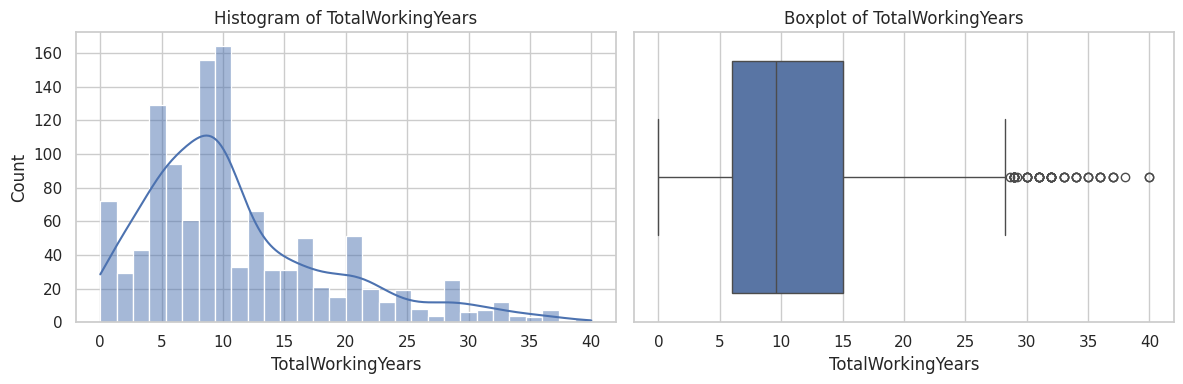

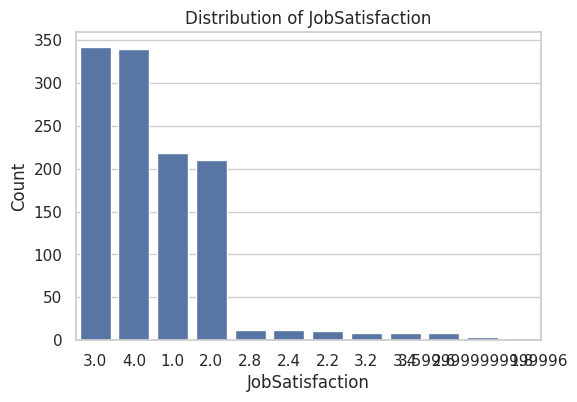

,Proportion
JobSatisfaction,
3.0,0.290816
4.0,0.289116
1.0,0.185374
2.0,0.178571
2.8,0.010204
2.4,0.010204
2.2,0.009354
3.2,0.006803
3.4,0.006803


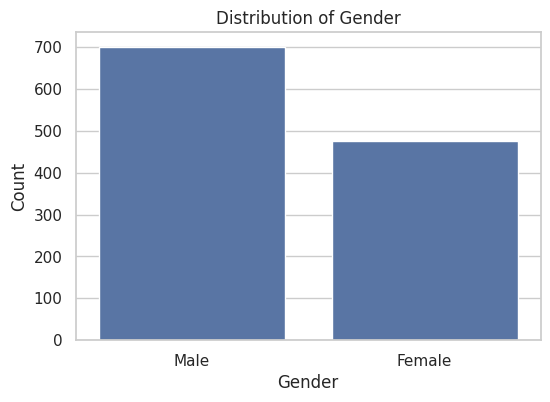

,Proportion
Gender,
Male,0.595238
Female,0.404762


In [ ]:
# EDA - BLOCK 1 : UNIVARIATE ANALYSIS
# (Train set only)

import seaborn as sns

sns.set(style="whitegrid")

# 1) NUMERIC VARIABLES

numeric_eda_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears"
]

for col in numeric_eda_vars:
    if col not in X_train_final.columns:
        continue

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    sns.histplot(
        X_train_final[col],
        bins=30,
        kde=True,
        ax=axes[0]
    )
    axes[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(
        x=X_train_final[col],
        ax=axes[1]
    )
    axes[1].set_title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

# 2) CATEGORICAL VARIABLES

categorical_eda_vars = [
    "JobSatisfaction",
    "Gender"
]

for col in categorical_eda_vars:
    if col not in X_train_final.columns:
        continue

    plt.figure(figsize=(6, 4))
    sns.countplot(
        x=X_train_final[col],
        order=X_train_final[col].value_counts().index
    )
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    display(
        X_train_final[col]
        .value_counts(normalize=True)
        .rename("Proportion")
        .to_frame()
    )


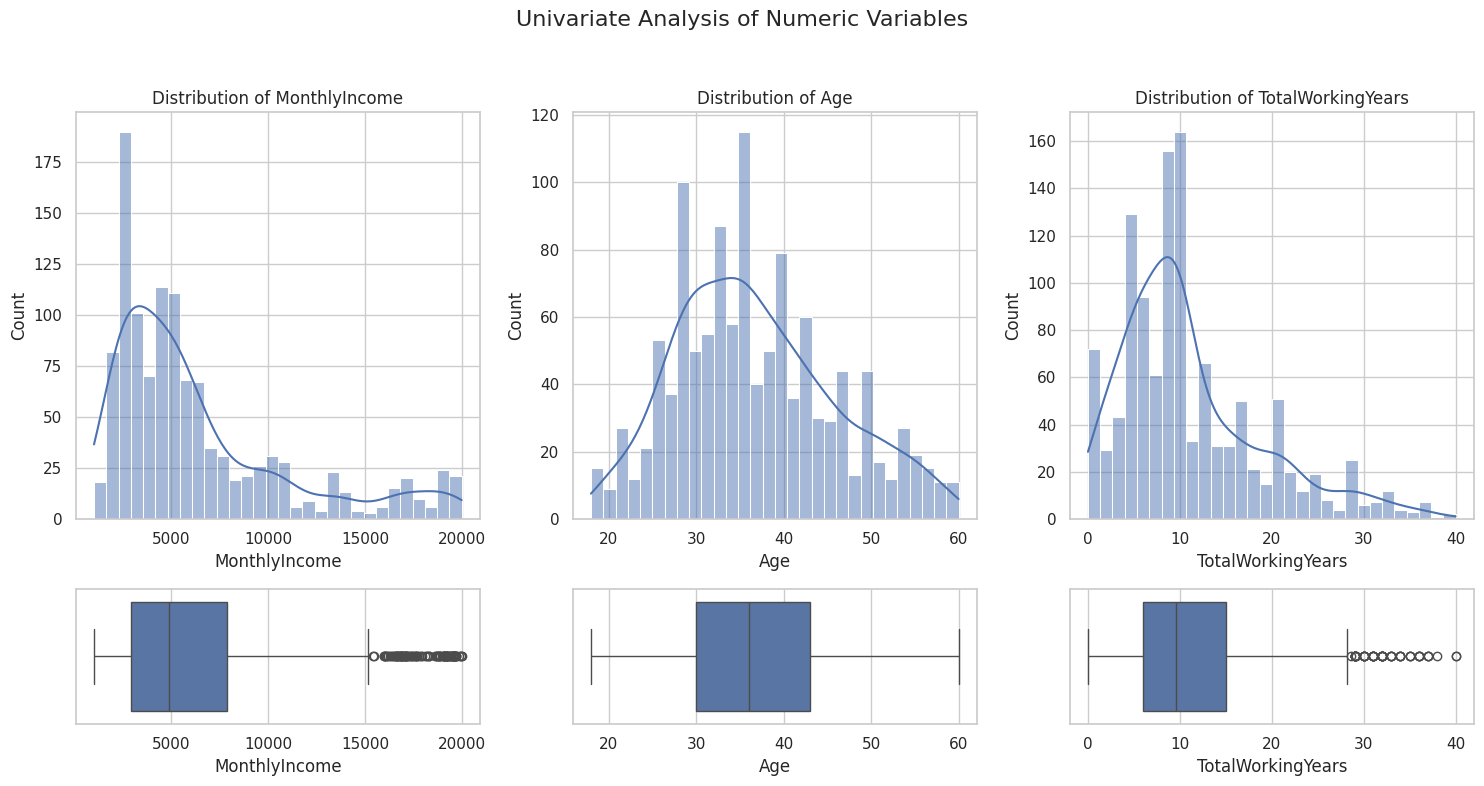

In [ ]:
sns.set(style="whitegrid")

numeric_vars = ["MonthlyIncome", "Age", "TotalWorkingYears"]
numeric_vars = [c for c in numeric_vars if c in X_train_final.columns]

fig, axes = plt.subplots(
    nrows=2,
    ncols=len(numeric_vars),
    figsize=(5 * len(numeric_vars), 8),
    gridspec_kw={"height_ratios": [3, 1]}
)

for i, col in enumerate(numeric_vars):
    # Histogram + KDE
    sns.histplot(
        X_train_final[col],
        bins=30,
        kde=True,
        ax=axes[0, i]
    )
    axes[0, i].set_title(f"Distribution of {col}")
    axes[0, i].set_xlabel(col)
    axes[0, i].set_ylabel("Count")

    # Boxplot
    sns.boxplot(
        x=X_train_final[col],
        ax=axes[1, i]
    )
    axes[1, i].set_xlabel(col)

plt.suptitle("Univariate Analysis of Numeric Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


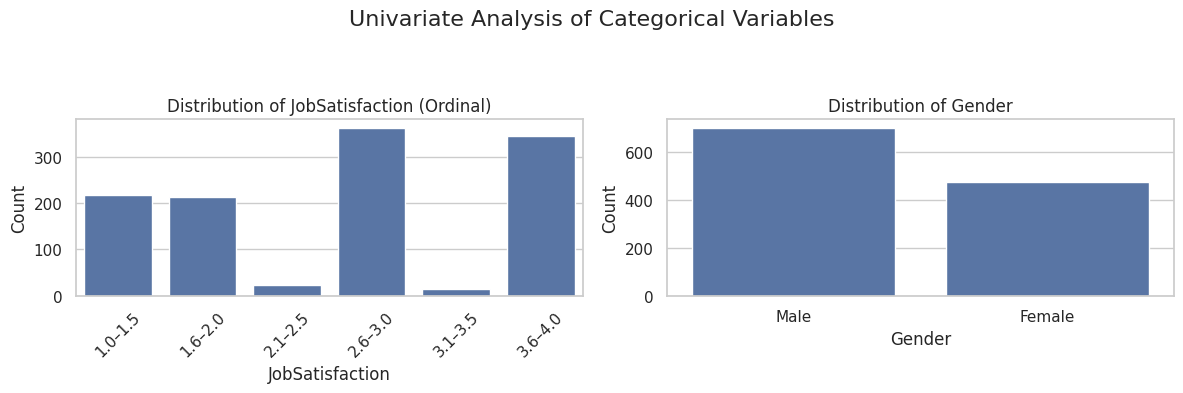

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# JobSatisfaction (ORDINAL with non-overlapping bins)

bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

labels = [
    "1.0–1.5",
    "1.6–2.0",
    "2.1–2.5",
    "2.6–3.0",
    "3.1–3.5",
    "3.6–4.0"
]

job_binned = pd.cut(
    X_train_final["JobSatisfaction"],
    bins=[1.0, 1.5, 2.01, 2.51, 3.01, 3.51, 4.01],
    labels=labels,
    include_lowest=True
)

sns.countplot(
    x=job_binned,
    order=labels,
    ax=axes[0]
)

axes[0].set_title("Distribution of JobSatisfaction (Ordinal)")
axes[0].set_xlabel("JobSatisfaction")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# Gender
sns.countplot(
    x=X_train_final["Gender"],
    order=X_train_final["Gender"].value_counts().index,
    ax=axes[1]
)

axes[1].set_title("Distribution of Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

plt.suptitle("Univariate Analysis of Categorical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()


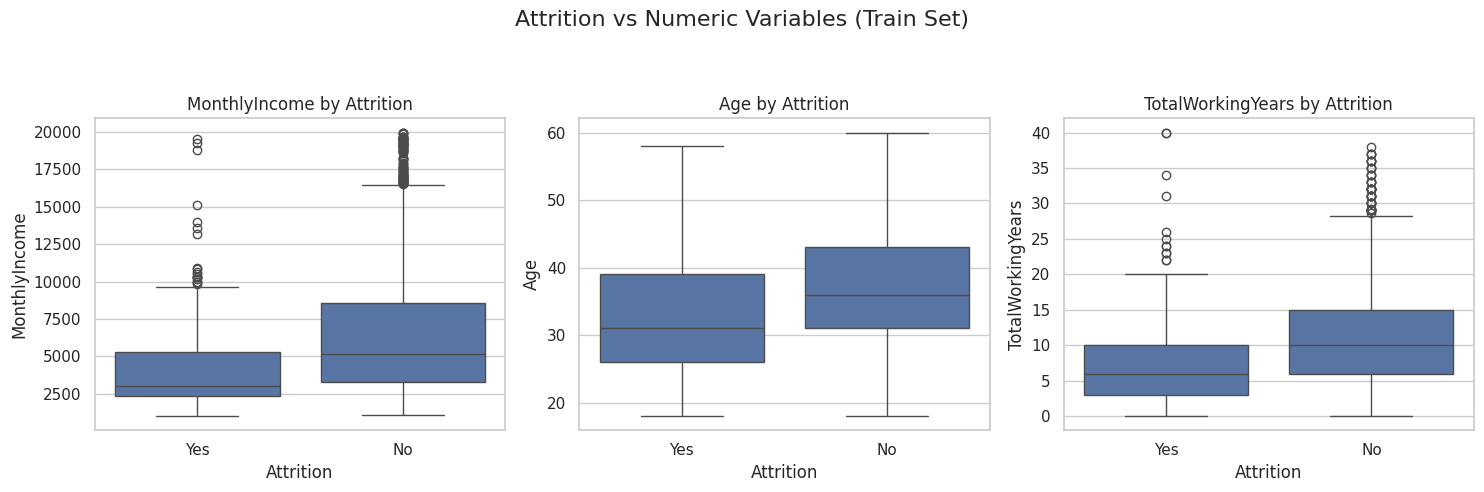

,mean,median,std
Attrition,,,
No,6777.111359,5128.0,4774.069396
Yes,4459.265263,3007.0,3350.247724


,mean,median,std
Attrition,,,
No,37.466531,36.0,8.872898
Yes,33.136842,31.0,9.881425


,mean,median,std
Attrition,,,
No,11.690467,10.0,7.719257
Yes,7.841053,6.0,7.149307


In [ ]:
sns.set(style="whitegrid")

eda_df = X_train_final.copy()
eda_df["Attrition"] = y_train_final

numeric_target_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears"
]

numeric_target_vars = [c for c in numeric_target_vars if c in eda_df.columns]

fig, axes = plt.subplots(
    nrows=1,
    ncols=len(numeric_target_vars),
    figsize=(5 * len(numeric_target_vars), 5)
)

if len(numeric_target_vars) == 1:
    axes = [axes]

for i, col in enumerate(numeric_target_vars):
    sns.boxplot(
        x="Attrition",
        y=col,
        data=eda_df,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} by Attrition")
    axes[i].set_xlabel("Attrition")
    axes[i].set_ylabel(col)

plt.suptitle("Attrition vs Numeric Variables (Train Set)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

for col in numeric_target_vars:
    display(
        eda_df
        .groupby("Attrition")[col]
        .agg(["mean", "median", "std"])
    )


In [ ]:
# EDA - BLOCK 3 : TARGET (Attrition) vs CATEGORICAL VARIABLES

from scipy.stats import chi2_contingency

eda_df = X_train_final.copy()
eda_df["Attrition"] = y_train_final

categorical_target_vars = [
    "JobSatisfaction",
    "Gender",
    "OverTime"
]

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

for col in categorical_target_vars:
    if col not in eda_df.columns:
        continue

    print(f"\n=== Attrition vs {col} ===")

    # Contingency table
    ct = pd.crosstab(eda_df[col], eda_df["Attrition"])
    display(ct)

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(ct)

    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"P-value: {p:.4f}")

    # Cramér's V
    v = cramers_v(ct)
    print(f"Cramér's V: {v:.3f}")



=== Attrition vs JobSatisfaction ===


Attrition,No,Yes
JobSatisfaction,,
1.0,167,51
1.8,3,0
2.0,176,34
2.2,9,2
2.4,12,0
2.6,4,4
2.8,9,3
3.0,287,55
3.2,7,1


Chi-square statistic: 26.350
Degrees of freedom: 11
P-value: 0.0058
Cramér's V: 0.150

=== Attrition vs Gender ===


Attrition,No,Yes
Gender,,
Female,403,73
Male,583,117


Chi-square statistic: 0.302
Degrees of freedom: 1
P-value: 0.5826
Cramér's V: 0.016

=== Attrition vs OverTime ===


Attrition,No,Yes
OverTime,,
No,757,84
Yes,229,106


Chi-square statistic: 81.333
Degrees of freedom: 1
P-value: 0.0000
Cramér's V: 0.263


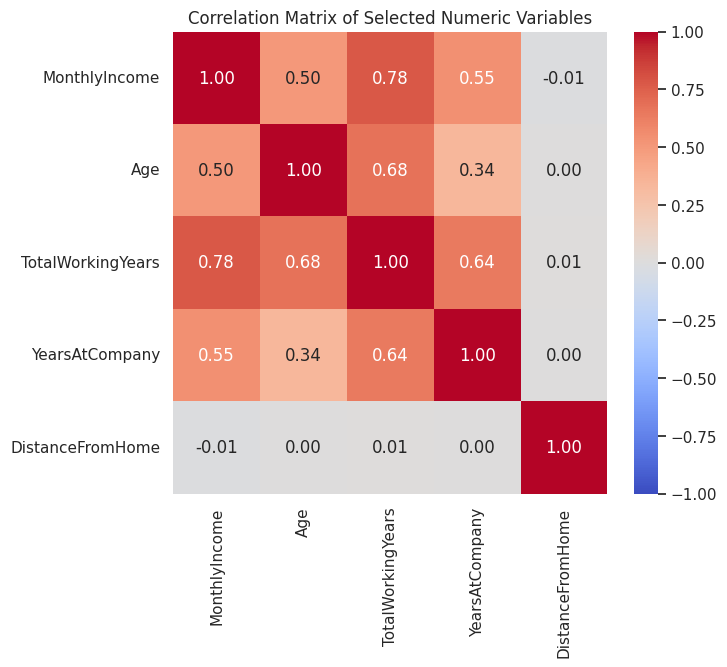

In [ ]:
# EDA - BLOCK 4 : MULTIVARIATE STRUCTURE
# (Correlation Heatmap - Train set only)

corr_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears",
    "YearsAtCompany",
    "DistanceFromHome"
]

corr_vars = [c for c in corr_vars if c in X_train_final.columns]

corr_matrix = X_train_final[corr_vars].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title("Correlation Matrix of Selected Numeric Variables")
plt.show()


# CDA

MonthlyIncome
Shapiro-Wilk Test:
 Attrition=Yes -> W=0.753, p=0.0000
 Attrition=No  -> W=0.818, p=0.0000


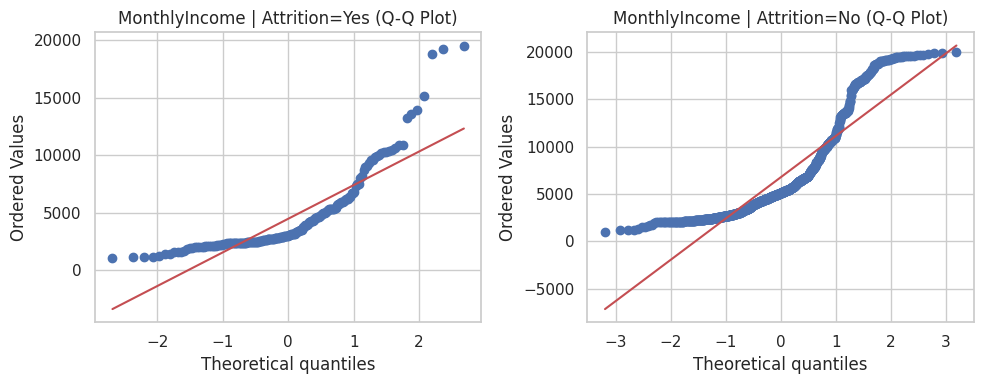

Levene Test: stat=18.509, p=0.0000
Age
Shapiro-Wilk Test:
 Attrition=Yes -> W=0.937, p=0.0000
 Attrition=No  -> W=0.979, p=0.0000


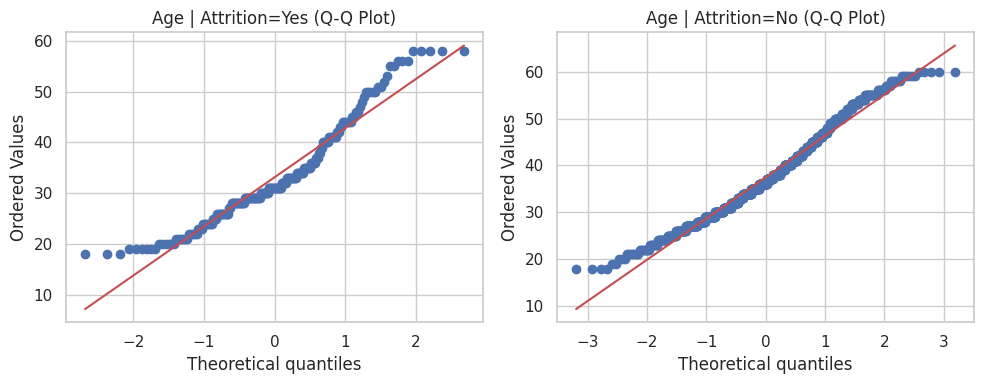

Levene Test: stat=0.698, p=0.4037
TotalWorkingYears
Shapiro-Wilk Test:
 Attrition=Yes -> W=0.829, p=0.0000
 Attrition=No  -> W=0.889, p=0.0000


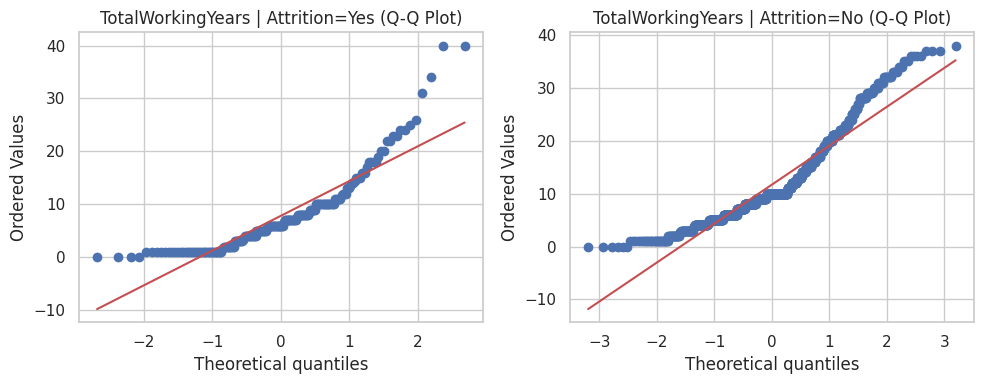

Levene Test: stat=2.547, p=0.1108


In [ ]:
# CONFIRMATORY DATA ANALYSIS
# STEP 1: ASSUMPTION CHECKS
# (Train set only)
from scipy.stats import shapiro, levene, probplot

sns.set(style="whitegrid")

conf_df = X_train_final.copy()
conf_df["Attrition"] = y_train_final

numeric_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears"
]

for col in numeric_vars:

    print(f"{col}")


    group_yes = conf_df[conf_df["Attrition"] == "Yes"][col]
    group_no  = conf_df[conf_df["Attrition"] == "No"][col]

    # Normality (Shapiro-Wilk)
    shapiro_yes = shapiro(group_yes.sample(500, random_state=411) if len(group_yes) > 500 else group_yes)
    shapiro_no  = shapiro(group_no.sample(500, random_state=411) if len(group_no) > 500 else group_no)

    print("Shapiro-Wilk Test:")
    print(f" Attrition=Yes -> W={shapiro_yes.statistic:.3f}, p={shapiro_yes.pvalue:.4f}")
    print(f" Attrition=No  -> W={shapiro_no.statistic:.3f}, p={shapiro_no.pvalue:.4f}")

    # Q-Q plots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    probplot(group_yes, plot=axes[0])
    axes[0].set_title(f"{col} | Attrition=Yes (Q-Q Plot)")
    probplot(group_no, plot=axes[1])
    axes[1].set_title(f"{col} | Attrition=No (Q-Q Plot)")
    plt.tight_layout()
    plt.show()

    # Variance homogeneity (Levene)
    lev_stat, lev_p = levene(group_yes, group_no)
    print(f"Levene Test: stat={lev_stat:.3f}, p={lev_p:.4f}")


In [ ]:
# CONFIRMATORY DATA ANALYSIS
# STEP 2: Mann–Whitney U Tests
# (Train set only)

from scipy.stats import mannwhitneyu

conf_df = X_train_final.copy()
conf_df["Attrition"] = y_train_final

numeric_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears"
]

results = []

for col in numeric_vars:
    group_yes = conf_df[conf_df["Attrition"] == "Yes"][col]
    group_no  = conf_df[conf_df["Attrition"] == "No"][col]

    # Mann–Whitney U test (two-sided)
    u_stat, p_val = mannwhitneyu(group_yes, group_no, alternative="two-sided")

    # Medians
    median_yes = group_yes.median()
    median_no  = group_no.median()

    results.append({
        "Variable": col,
        "Median (Attrition=Yes)": median_yes,
        "Median (Attrition=No)": median_no,
        "U statistic": u_stat,
        "p-value": p_val
    })

results_df = pd.DataFrame(results)
display(results_df)


,Variable,Median (Attrition=Yes),Median (Attrition=No),U statistic,p-value
0,MonthlyIncome,3007.0,5128.0,60116.0,4.975272e-15
1,Age,31.0,36.0,66119.5,1.268360e-10
2,TotalWorkingYears,6.0,10.0,61382.5,4.461901e-14


In [ ]:
from scipy.stats import mannwhitneyu, norm

# CDA: Test EDA hypotheses on TRAIN set (no leakage logic)
# Hypotheses (directional):
# H1_income: MonthlyIncome(Attrition=Yes) < MonthlyIncome(Attrition=No)
# H1_age:    Age(Attrition=Yes) < Age(Attrition=No)
# H1_twy:    TotalWorkingYears(Attrition=Yes) < TotalWorkingYears(Attrition=No)

#combine
cda_df = X_train_final.copy()
cda_df["Attrition"] = y_train_final

target = "Attrition"
group_yes = cda_df[cda_df[target] == "Yes"]
group_no  = cda_df[cda_df[target] == "No"]

test_vars = ["MonthlyIncome", "Age", "TotalWorkingYears"]

results = []

def rank_biserial_from_u(U, n1, n2):
    """
    Rank-biserial correlation (RBC) from Mann–Whitney U
    Range: [-1, 1], sign indicates direction.
    """
    return 1 - (2 * U) / (n1 * n2)

for var in test_vars:
    # NaN varsa düş (imputation sonrası genelde yok ama güvenli)
    x_yes = group_yes[var].dropna().values
    x_no  = group_no[var].dropna().values

    n1, n2 = len(x_yes), len(x_no)

    # Two-sided Mann–Whitney U
    U_two, p_two = mannwhitneyu(x_yes, x_no, alternative="two-sided")

    # One-sided p-value (direction: Yes < No)
    U_less, p_less = mannwhitneyu(x_yes, x_no, alternative="less")

    # Effect size (rank-biserial correlation)
    rbc = rank_biserial_from_u(U_less, n1, n2)  # direction aligned to "less"

    results.append({
        "Variable": var,
        "Median (Yes)": np.median(x_yes),
        "Median (No)": np.median(x_no),
        "U statistic": U_less,
        "p-value (one-sided, Yes<No)": p_less,
        "p-value (two-sided)": p_two,
        "Effect size (Rank-biserial r)": rbc,
        "n(Yes)": n1,
        "n(No)": n2
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values("p-value (one-sided, Yes<No)")
display(results_df)


,Variable,Median (Yes),Median (No),U statistic,"p-value (one-sided, Yes<No)",p-value (two-sided),Effect size (Rank-biserial r),n(Yes),n(No)
0,MonthlyIncome,3007.0,5128.0,60116.0,2.487636e-15,4.975272e-15,0.358215,190,986
2,TotalWorkingYears,6.0,10.0,61382.5,2.230950e-14,4.461901e-14,0.344694,190,986
1,Age,31.0,36.0,66119.5,6.341800e-11,1.268360e-10,0.294123,190,986


# PCA

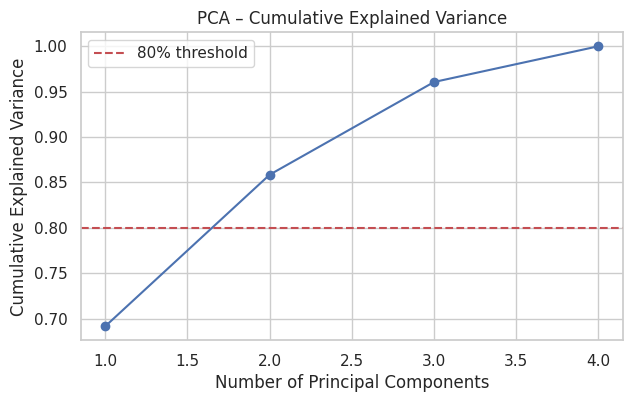

Number of components selected (80% variance): 2


,PC1,PC2
MonthlyIncome,0.518197,-0.093435
Age,0.451415,0.726761
TotalWorkingYears,0.567459,0.049612
YearsAtCompany,0.453526,-0.678695


PCA train shape: (1176, 2)
PCA test shape : (294, 2)


In [ ]:
# PCA - DIMENSION REDUCTION
# - Fit on TRAIN only (no leakage)
# - Explained variance threshold: 80%

from sklearn.decomposition import PCA


#Select numeric variables for PCA
# (correlated experience/income-related variables)

pca_vars = [
    "MonthlyIncome",
    "Age",
    "TotalWorkingYears",
    "YearsAtCompany"
]

# Keep only existing columns
pca_vars = [c for c in pca_vars if c in X_train_final.columns]

#Standardization (MANDATORY for PCA)
scaler_pca = StandardScaler()

X_train_pca_scaled = scaler_pca.fit_transform(X_train_final[pca_vars])
X_test_pca_scaled  = scaler_pca.transform(X_test_final[pca_vars])

#Fit PCA on TRAIN data (no n_components yet)
pca_full = PCA()
pca_full.fit(X_train_pca_scaled)

# Explained variance ratios
explained_var = pca_full.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

#Scree plot + cumulative explained variance

plt.figure(figsize=(7, 4))
plt.plot(range(1, len(cum_explained_var) + 1),
         cum_explained_var,
         marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA – Cumulative Explained Variance")
plt.legend()
plt.show()

#Select number of components to reach 80%
n_components_80 = np.argmax(cum_explained_var >= 0.80) + 1
print(f"Number of components selected (80% variance): {n_components_80}")

#Refit PCA with selected number of components
pca_final = PCA(n_components=n_components_80)
X_train_pca = pca_final.fit_transform(X_train_pca_scaled)
X_test_pca  = pca_final.transform(X_test_pca_scaled)


#PCA loadings (interpretation)
loadings = pd.DataFrame(
    pca_final.components_.T,
    index=pca_vars,
    columns=[f"PC{i+1}" for i in range(n_components_80)]
)

display(loadings)

#Final PCA datasets (for modeling)
X_train_pca_final = pd.DataFrame(
    X_train_pca,
    columns=[f"PC{i+1}" for i in range(n_components_80)],
    index=X_train_final.index
)

X_test_pca_final = pd.DataFrame(
    X_test_pca,
    columns=[f"PC{i+1}" for i in range(n_components_80)],
    index=X_test_final.index
)

print("PCA train shape:", X_train_pca_final.shape)
print("PCA test shape :", X_test_pca_final.shape)


**t-SNE & UMAP (Non-linear Dimension Reduction)**

In [ ]:
from sklearn.manifold import TSNE
X_train_num = pd.get_dummies(X_train, drop_first=True)
y_train_num = np.array(y_train)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)


In [ ]:
X_train_num = pd.get_dummies(X_train, drop_first=True)
imp = SimpleImputer(strategy="median")
X_train_imputed = imp.fit_transform(X_train_num)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
y_train_num = np.array(y_train)


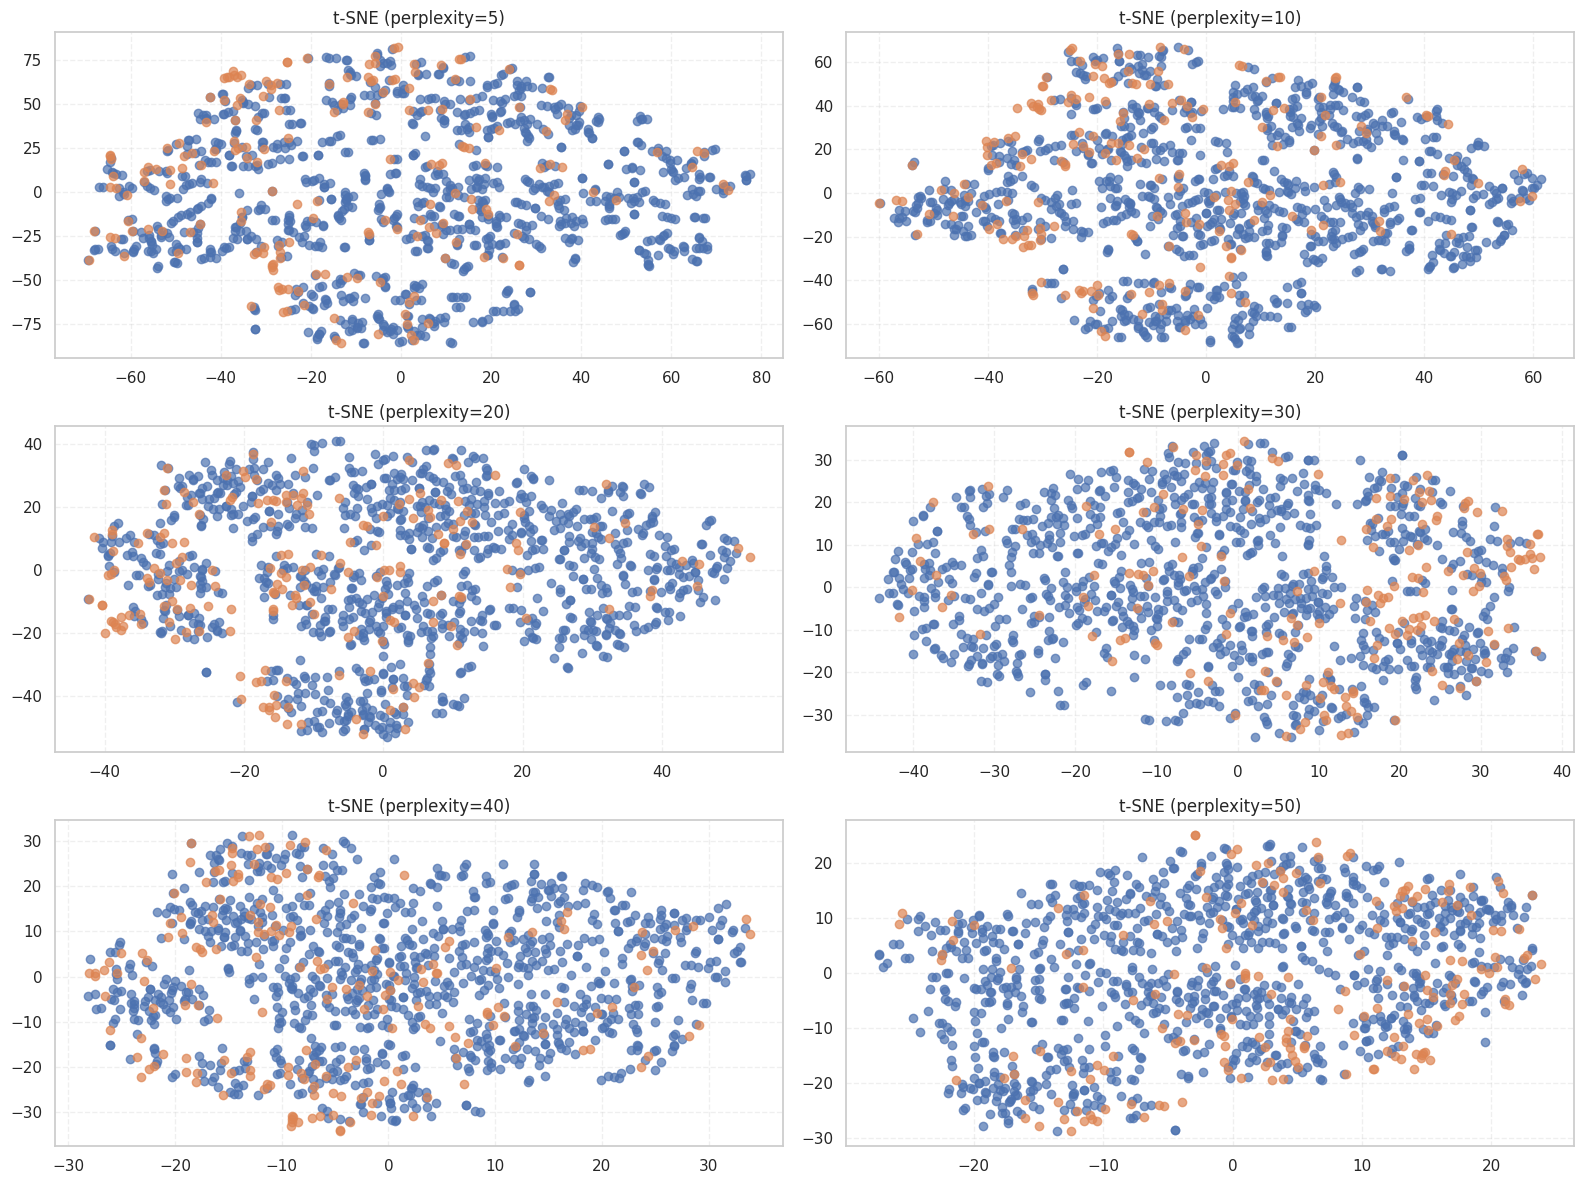

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

perplexities = [5, 10, 20, 30, 40, 50]
plt.figure(figsize=(16, 12))

for idx, perp in enumerate(perplexities, 1):
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate='auto',
        init='pca',
        random_state=42
    )
    X_train_tsne = tsne.fit_transform(X_train_scaled)

    plt.subplot(3, 2, idx)
    for cls in np.unique(y_train_num):
        mask = (y_train_num == cls)
        plt.scatter(X_train_tsne[mask, 0], X_train_tsne[mask, 1], alpha=0.7)
    plt.title(f"t-SNE (perplexity={perp})")
    plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


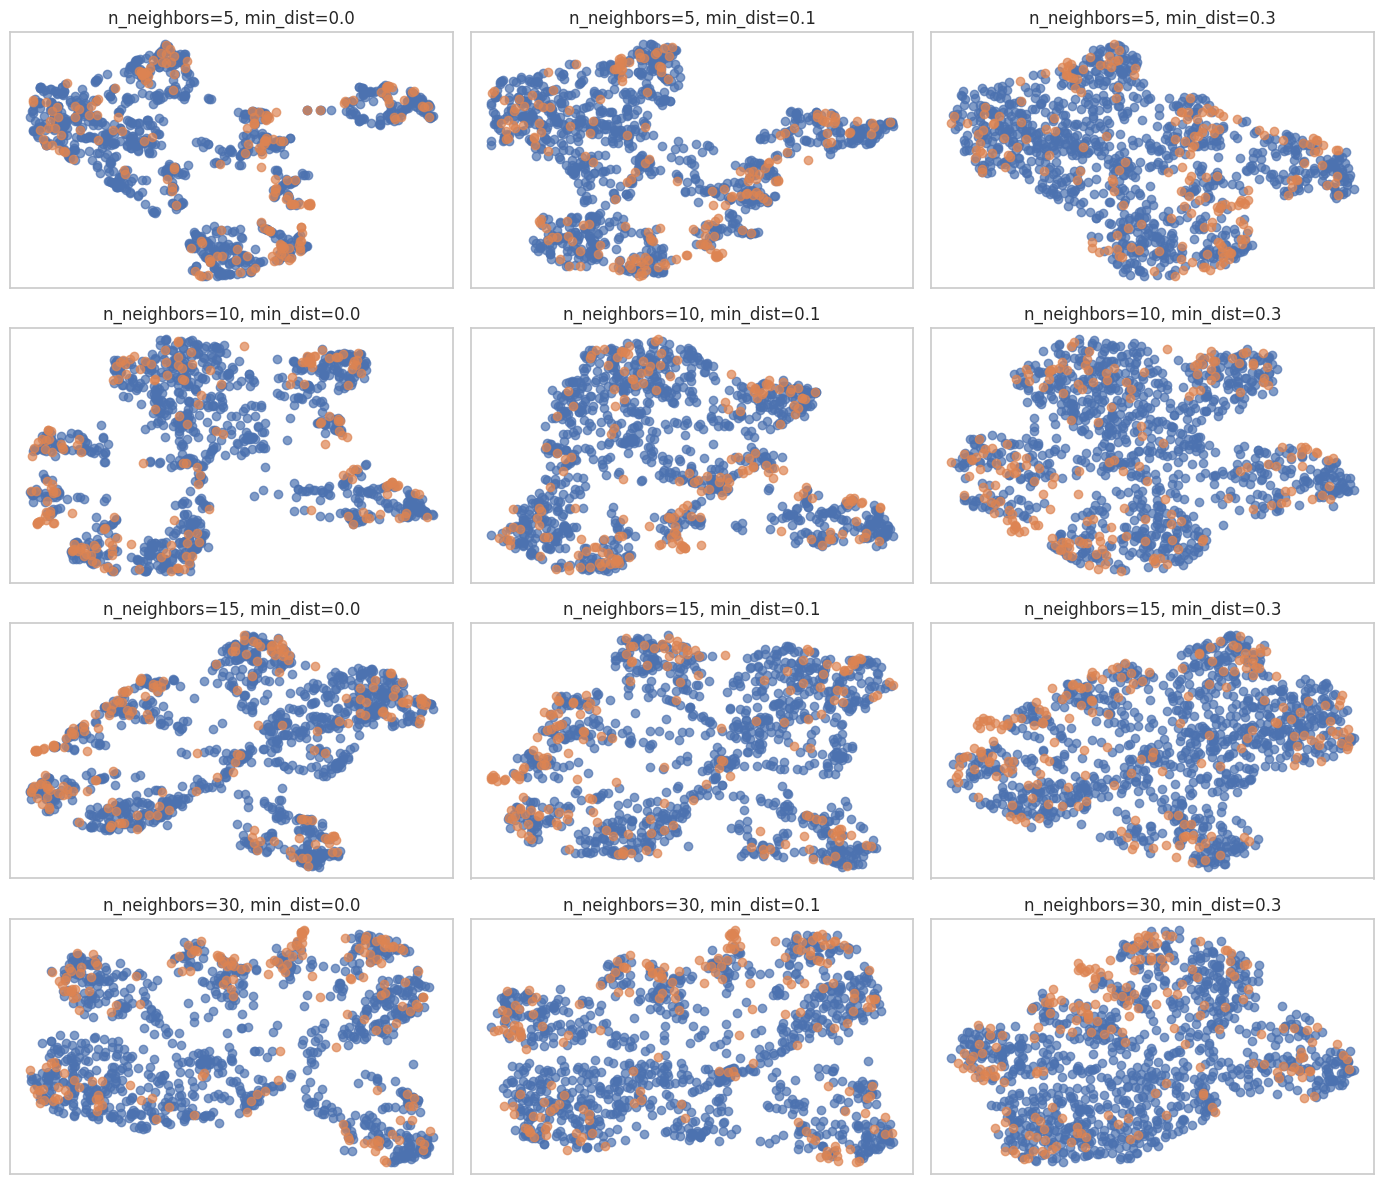

In [ ]:
!pip -q install umap-learn
import umap.umap_ as umap

neighbors_list = [5, 10, 15, 30]
min_dist_list = [0.0, 0.1, 0.3]

plt.figure(figsize=(14, 12))
plot_num = 1

for n in neighbors_list:
    for d in min_dist_list:
        umap_model = umap.UMAP(
            n_neighbors=n,
            min_dist=d,
            n_components=2,
            metric='euclidean',
            random_state=42
        )
        X_train_umap = umap_model.fit_transform(X_train_scaled)

        plt.subplot(len(neighbors_list), len(min_dist_list), plot_num)
        for cls in np.unique(y_train_num):
            mask = (y_train_num == cls)
            plt.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], alpha=0.7)
        plt.title(f"n_neighbors={n}, min_dist={d}")
        plt.xticks([]); plt.yticks([])
        plot_num += 1

plt.tight_layout()
plt.show()


# Modeling

In [ ]:
print(df.isnull().sum())

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome            102
Education                     0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobSatisfaction             102
MaritalStatus                 0
MonthlyIncome               102
MonthlyRate                   0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears           102
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany              102
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
dtype: int64


In [ ]:
# 7 Models (incl. PCA+Logistic) + CV(ROC-AUC) + Test metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, cohen_kappa_score

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

#Split
RANDOM_STATE = 42

y = df["Attrition"]                       # expects labels like "Yes"/"No"
X = df.drop(columns=["Attrition"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=RANDOM_STATE
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


#Preprocess (RAW-feature models)
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns
num_cols = X_train.select_dtypes(exclude=["object", "category"]).columns

numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])


#Metrics helper (TEST set)
# -----------------------------
def _to_binary(series):
    """Try to map labels to 0/1 robustly."""
    if set(series.unique()) <= {0, 1}:
        return series.astype(int)

    # common string labels
    label_map = {"No": 0, "Yes": 1, "N": 0, "Y": 1, "False": 0, "True": 1}
    mapped = series.map(label_map)
    if mapped.isna().any():
        raise ValueError(
            "Target labels are not {0,1} or {'No','Yes'}. "
            "Please adjust label_map in _to_binary()."
        )
    return mapped.astype(int)

def eval_binary_metrics(y_true01, y_pred01, y_proba1):
    tn, fp, fn, tp = confusion_matrix(y_true01, y_pred01, labels=[0,1]).ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    f1 = f1_score(y_true01, y_pred01, pos_label=1)
    auc = roc_auc_score(y_true01, y_proba1)
    kappa = cohen_kappa_score(y_true01, y_pred01)

    return {
        "Recall(Sensitivity)": sensitivity,
        "Specificity": specificity,
        "F1": f1,
        "ROC_AUC": auc,
        "Kappa": kappa
    }

y_test_bin = _to_binary(y_test)

#Models (exactly per request) + PCA+Logistic as 7th
models = {}

#Logistic baseline (imbalanced)
models["Logistic (Imbalanced baseline)"] = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=3000, solver="liblinear"))
])

#Ridge (L2) NO class_weight
models["Ridge (L2)"] = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegressionCV(
        penalty="l2",
        solver="saga",
        scoring="roc_auc",
        cv=cv,
        max_iter=5000
    ))
])

#Lasso (L1) NO class_weight
models["Lasso (L1)"] = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegressionCV(
        penalty="l1",
        solver="saga",
        scoring="roc_auc",
        cv=cv,
        max_iter=5000
    ))
])

#Elastic Net NO class_weight
models["Elastic Net"] = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegressionCV(
        penalty="elasticnet",
        solver="saga",
        l1_ratios=[0.2, 0.5, 0.8],
        scoring="roc_auc",
        cv=cv,
        max_iter=5000
    ))
])

#SMOTE only (no class_weight)
models["SMOTE + Logistic"] = ImbPipeline([
    ("prep", preprocess),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model", LogisticRegression(max_iter=3000, solver="liblinear"))
])

#Cost-sensitive (class_weight=balanced)
models["Cost-sensitive (class_weight=balanced)"] = Pipeline([
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=3000, solver="liblinear", class_weight="balanced"))
])

#PCA + Logistic (dimension reduction model)
pca_vars = ["MonthlyIncome", "Age", "TotalWorkingYears", "YearsAtCompany"]
pca_vars = [c for c in pca_vars if c in X_train.columns]

pca_preprocess = ColumnTransformer(
    transformers=[
        ("pca_num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler()),
            # n_components=0.80 selects #PCs to explain >=80% variance (train-only inside CV folds)
            ("pca", PCA(n_components=0.80, svd_solver="full"))
        ]), pca_vars)
    ],
    remainder="drop"
)

models["PCA(80%) + Logistic"] = Pipeline([
    ("pca_prep", pca_preprocess),
    ("model", LogisticRegression(max_iter=3000, solver="liblinear"))
])


#CV summary (ROC-AUC)
cv_rows = []
for name, clf in models.items():
    cv_auc = cross_val_score(clf, X_train, y_train, cv=cv, scoring="roc_auc")
    cv_rows.append({
        "Model": name,
        "CV_ROC_AUC_Mean": cv_auc.mean(),
        "CV_ROC_AUC_Std": cv_auc.std()
    })
cv_summary = pd.DataFrame(cv_rows)


#TEST metrics
test_rows = []
for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # probability for positive class
    proba = clf.predict_proba(X_test)

    # handle both string labels and 0/1 labels robustly
    classes = list(clf.classes_)
    if "Yes" in classes:
        pos_idx = classes.index("Yes")
        y_pred_bin = _to_binary(pd.Series(y_pred, index=y_test.index))
    elif 1 in classes:
        pos_idx = classes.index(1)
        y_pred_bin = pd.Series(y_pred, index=y_test.index).astype(int)
    else:
        raise ValueError(f"Cannot determine positive class for model: {name}. classes_={classes}")

    y_proba_pos = proba[:, pos_idx]

    m = eval_binary_metrics(y_test_bin, y_pred_bin, y_proba_pos)
    m["Model"] = name
    test_rows.append(m)

test_summary = pd.DataFrame(test_rows)


#ONE merged table (CV + TEST)
final_table = (
    cv_summary
    .merge(test_summary, on="Model", how="inner")
    .sort_values("CV_ROC_AUC_Mean", ascending=False)
    .reset_index(drop=True)
)

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 220)

print(final_table.to_string(index=False))
final_table


                                 Model  CV_ROC_AUC_Mean  CV_ROC_AUC_Std  Recall(Sensitivity)  Specificity       F1  ROC_AUC    Kappa
        Logistic (Imbalanced baseline)         0.829856        0.038065             0.404255     0.963563 0.506667 0.830821 0.439798
                            Ridge (L2)         0.829374        0.037795             0.425532     0.955466 0.512821 0.832458 0.441902
                           Elastic Net         0.828920        0.037676             0.404255     0.955466 0.493506 0.832113 0.421435
                            Lasso (L1)         0.827532        0.038582             0.425532     0.959514 0.519481 0.832371 0.451105
Cost-sensitive (class_weight=balanced)         0.817532        0.036100             0.787234     0.769231 0.524823 0.834525 0.396100
                      SMOTE + Logistic         0.814861        0.032238             0.744681     0.773279 0.507246 0.830649 0.375601
                   PCA(80%) + Logistic         0.681804        0.0350

,Model,CV_ROC_AUC_Mean,CV_ROC_AUC_Std,Recall(Sensitivity),Specificity,F1,ROC_AUC,Kappa
0,Logistic (Imbalanced baseline),0.829856,0.038065,0.404255,0.963563,0.506667,0.830821,0.439798
1,Ridge (L2),0.829374,0.037795,0.425532,0.955466,0.512821,0.832458,0.441902
2,Elastic Net,0.828920,0.037676,0.404255,0.955466,0.493506,0.832113,0.421435
3,Lasso (L1),0.827532,0.038582,0.425532,0.959514,0.519481,0.832371,0.451105
4,Cost-sensitive (class_weight=balanced),0.817532,0.036100,0.787234,0.769231,0.524823,0.834525,0.396100
5,SMOTE + Logistic,0.814861,0.032238,0.744681,0.773279,0.507246,0.830649,0.375601
6,PCA(80%) + Logistic,0.681804,0.035098,0.000000,1.000000,0.000000,0.628047,0.000000


In [ ]:
import statsmodels.api as sm

#Select and fit the final model
final_model = models["Cost-sensitive (class_weight=balanced)"]
final_model.fit(X_train, y_train)

prep = final_model.named_steps["prep"]
clf  = final_model.named_steps["model"]

# Extract feature names and sklearn coefficients
feature_names = prep.get_feature_names_out()
betas = clf.coef_.ravel()
intercept = clf.intercept_[0]

coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Beta": betas,
    "Odds_Ratio": np.exp(betas)
}).sort_values("Beta", ascending=False)


#Compute 95% Confidence Intervals using statsmodels
# Preprocessed TRAIN matrix
X_train_prep = prep.transform(X_train)

# Convert y to binary (0/1)
if set(pd.Series(y_train).unique()) <= {0, 1}:
    y_train_bin = pd.Series(y_train).astype(int).values
else:
    y_train_bin = pd.Series(y_train).map({"No": 0, "Yes": 1}).astype(int).values

#Add Intercept
X_sm = sm.add_constant(X_train_prep, has_constant="add")

# Logit model
logit = sm.Logit(y_train_bin, X_sm)
result = logit.fit(disp=False)

# CI
conf = result.conf_int()

if isinstance(conf, np.ndarray):
    conf = pd.DataFrame(conf, columns=["CI_low", "CI_high"])
else:
    conf = conf.rename(columns={0: "CI_low", 1: "CI_high"})

# Parameters
params = result.params


#Final CI
ci_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(feature_names),
    "Beta": params,
    "CI_low": conf["CI_low"].values,
    "CI_high": conf["CI_high"].values
})

ci_df["Odds_Ratio"] = np.exp(ci_df["Beta"])
ci_df["OR_CI_low"]  = np.exp(ci_df["CI_low"])
ci_df["OR_CI_high"] = np.exp(ci_df["CI_high"])

ci_df = ci_df.sort_values("Beta", ascending=False).reset_index(drop=True)



In [ ]:
#SINGLE COMBINED TABLE

final_coef_table = pd.DataFrame({
    "Feature": ["Intercept"] + list(feature_names),
    "Beta": result.params,
    "Odds_Ratio": np.exp(result.params),
    "CI_low": conf["CI_low"].values,
    "CI_high": conf["CI_high"].values
})

final_coef_table["OR_CI_low"]  = np.exp(final_coef_table["CI_low"])
final_coef_table["OR_CI_high"] = np.exp(final_coef_table["CI_high"])

# İsteğe bağlı: Intercept'i ayrı tutmak istersen
# final_coef_table = final_coef_table[final_coef_table["Feature"] != "Intercept"]

final_coef_table = (
    final_coef_table
    .sort_values("Beta", ascending=False)
    .reset_index(drop=True)
)

def clean_feature_name(name):
    # Remove num_ / cat_ prefixes
    name = name.replace("num__", "").replace("cat__", "")
    name = name.replace("num_", "").replace("cat_", "")

    # Make one-hot encoded feature names more readable
    if "_" in name:
        parts = name.split("_")
        if parts[-1].lower() in ["yes", "no", "male", "female", "single", "married", "divorced"]:
            name = "_".join(parts[:-1]) + f" ({parts[-1]})"

    return name


# Cleaned feature names
final_coef_table["Feature_Clean"] = final_coef_table["Feature"].apply(clean_feature_name)
report_table = final_coef_table[
    ["Feature_Clean", "Beta", "Odds_Ratio"]
].rename(columns={"Feature_Clean": "Variable"})
print("Intercept:", intercept)
display(report_table)



Intercept: -0.1775726603227937


,Variable,Beta,Odds_Ratio
0,BusinessTravel_Travel_Frequently,0.729067,2.073146
1,YearsSinceLastPromotion,0.568335,1.765325
2,OverTime (Yes),0.518594,1.679664
3,NumCompaniesWorked,0.480376,1.616682
4,DistanceFromHome,0.353779,1.424441
5,MaritalStatus (Single),0.311771,1.365841
6,YearsAtCompany,0.203937,1.226221
7,PerformanceRating,0.121499,1.129188
8,Department_Sales,0.083175,1.086732
9,MonthlyRate,0.018450,1.018621
